In [1]:
# Unsupervised-Market Basket Analysis- E-Commerce Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("e-commerce data.csv", encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

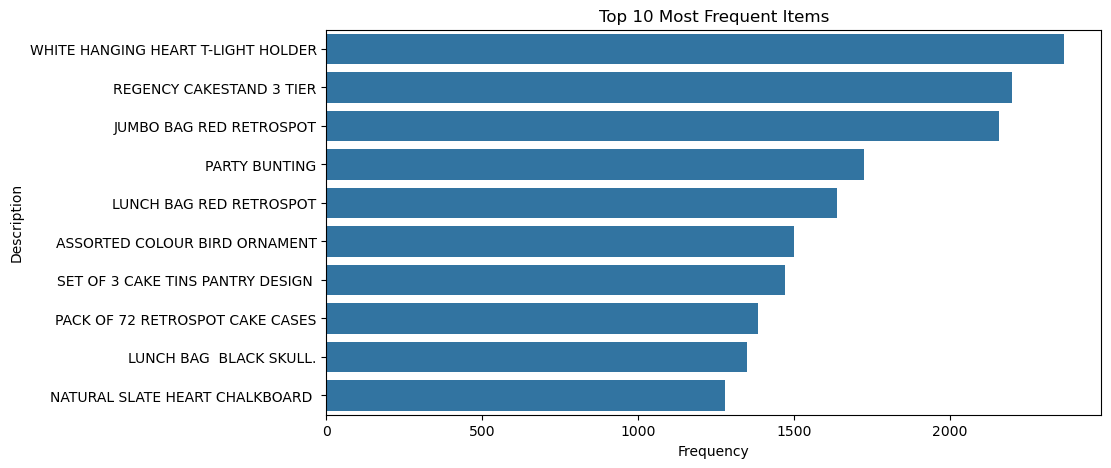

In [7]:
top_items = df['Description'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_items.values, y=top_items.index)
plt.title("Top 10 Most Frequent Items")
plt.xlabel("Frequency")
plt.show()

In [8]:
basket = df.groupby(['InvoiceNo', 'InvoiceDate'])['Description'].apply(list).reset_index()
basket.head()

,InvoiceNo,InvoiceDate,Description
0,536365,12/1/2010 8:26,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
1,536366,12/1/2010 8:28,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA..."
2,536367,12/1/2010 8:34,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO..."
3,536368,12/1/2010 8:34,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS..."
4,536369,12/1/2010 8:35,[BATH BUILDING BLOCK WORD]


In [9]:
def clean_list(x):
    return [str(i) for i in x if pd.notnull(i)]

basket['Description'] = basket['Description'].apply(clean_list)


In [10]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(basket['Description']).transform(basket['Description'])
df_trans = pd.DataFrame(te_ary, columns=te.columns_)
df_trans.head()


,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
frequent_itemsets = apriori(df_trans, min_support=0.005, use_colnames=True, low_memory=True)
frequent_itemsets.sort_values(by='support', ascending=False).head(10)

,support,itemsets
1225,0.088733,(WHITE HANGING HEART T-LIGHT HOLDER)
887,0.083606,(REGENCY CAKESTAND 3 TIER)
561,0.082296,(JUMBO BAG RED RETROSPOT)
754,0.065760,(PARTY BUNTING)
621,0.061943,(LUNCH BAG RED RETROSPOT)
87,0.056547,(ASSORTED COLOUR BIRD ORNAMENT)
991,0.056200,(SET OF 3 CAKE TINS PANTRY DESIGN )
730,0.051420,(PACK OF 72 RETROSPOT CAKE CASES)
613,0.049917,(LUNCH BAG BLACK SKULL.)
684,0.048799,(NATURAL SLATE HEART CHALKBOARD )


In [12]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.9)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules.sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
25056,"(REGENCY TEA PLATE ROSES , REGENCY TEA PLATE G...","(ROSES REGENCY TEACUP AND SAUCER , REGENCY TEA...",0.005242,0.795322,125.811154
25037,"(ROSES REGENCY TEACUP AND SAUCER , REGENCY TEA...","(REGENCY TEA PLATE ROSES , REGENCY TEA PLATE G...",0.005242,0.829268,125.811154
25106,"(HERB MARKER MINT, HERB MARKER THYME, HERB MAR...","(HERB MARKER BASIL, HERB MARKER CHIVES , HERB ...",0.006090,0.810256,122.212105
25111,"(HERB MARKER BASIL, HERB MARKER CHIVES , HERB ...","(HERB MARKER MINT, HERB MARKER THYME, HERB MAR...",0.006090,0.918605,122.212105
25090,"(HERB MARKER BASIL, HERB MARKER MINT, HERB MAR...","(HERB MARKER CHIVES , HERB MARKER ROSEMARY)",0.006090,0.887640,121.200296
25127,"(HERB MARKER CHIVES , HERB MARKER ROSEMARY)","(HERB MARKER BASIL, HERB MARKER MINT, HERB MAR...",0.006090,0.831579,121.200296
25045,"(REGENCY TEA PLATE GREEN , ROSES REGENCY TEACU...","(REGENCY TEA PLATE ROSES , REGENCY TEA PLATE P...",0.005242,0.772727,120.764239
25048,"(REGENCY TEA PLATE ROSES , REGENCY TEA PLATE P...","(REGENCY TEA PLATE GREEN , ROSES REGENCY TEACU...",0.005242,0.819277,120.764239
25133,"(HERB MARKER THYME, HERB MARKER CHIVES )","(HERB MARKER BASIL, HERB MARKER MINT, HERB MAR...",0.006090,0.831579,120.523199
25084,"(HERB MARKER BASIL, HERB MARKER MINT, HERB MAR...","(HERB MARKER THYME, HERB MARKER CHIVES )",0.006090,0.882682,120.523199


In [13]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules.shape

(25140, 14)

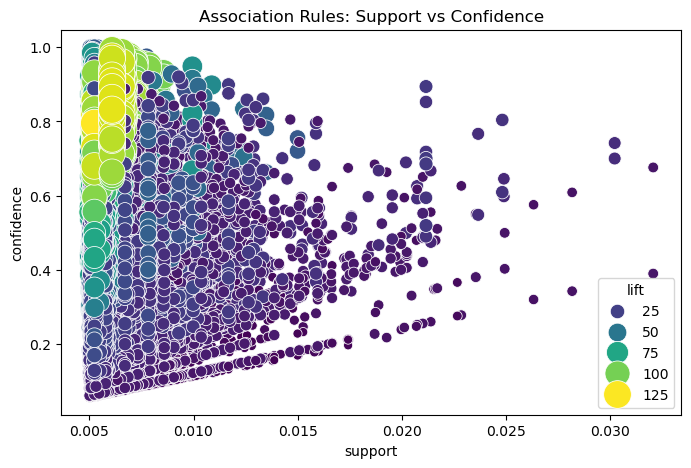

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='viridis', sizes=(40, 400))
plt.title("Association Rules: Support vs Confidence")
plt.show()

In [15]:
rules[rules['lift'] > 1][['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
0,(12 PENCILS SMALL TUBE RED RETROSPOT),(12 PENCIL SMALL TUBE WOODLAND),0.005127,0.363388,26.407211
1,(12 PENCIL SMALL TUBE WOODLAND),(12 PENCILS SMALL TUBE RED RETROSPOT),0.005127,0.372549,26.407211
2,(12 PENCILS SMALL TUBE RED RETROSPOT),(12 PENCILS SMALL TUBE SKULL),0.005820,0.412568,29.897373
3,(12 PENCILS SMALL TUBE SKULL),(12 PENCILS SMALL TUBE RED RETROSPOT),0.005820,0.421788,29.897373
4,(3 PIECE SPACEBOY COOKIE CUTTER SET),(SET OF 3 BUTTERFLY COOKIE CUTTERS),0.005551,0.374026,13.941603
...,...,...,...,...,...
25135,(HERB MARKER ROSEMARY),"(HERB MARKER PARSLEY, HERB MARKER BASIL, HERB ...",0.006090,0.655602,105.641453
25136,(HERB MARKER BASIL),"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY, HE...",0.006090,0.647541,98.818563
25137,(HERB MARKER MINT),"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY, HE...",0.006090,0.655602,102.459481
25138,(HERB MARKER THYME),"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY, HE...",0.006090,0.663866,107.641649
